# Assignment

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [4]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [12]:
data.shape

(1436, 38)

#Taking only the required columns

In [16]:
data1 = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [26]:
data1.shape

(1436, 9)

In [23]:
#Renaming the columns
data2 = data1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT','Weight':'WT'},axis=1)
data2.head(3)

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165


In [24]:
#Checking the data types of the variables
#Checking if null values present or not
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   WT      1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [27]:
data2.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [29]:
data2.isnull().sum()

Price    0
Age      0
KM       0
HP       0
CC       0
Doors    0
Gears    0
QT       0
WT       0
dtype: int64

In [30]:
#checking for duplicated values
data2[data2.duplicated()].shape

(1, 9)

In [32]:
#duplicated values
data2[data2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
113,24950,8,13253,116,2000,5,5,234,1320


In [34]:
#Removing the duplicate Values
data2 = data2.drop_duplicates().reset_index(drop=True)
data2.shape

(1435, 9)

In [35]:
data2[data2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT


In [37]:
data2.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.boxplot(data1['RnD_Spend'])
plt.title('RnD_Spend')
plt.subplot(222)
plt.boxplot(data1['Administration'])
plt.title('Administration')
plt.subplot(223)
plt.boxplot(data1['Marketing_Spend'])
plt.title('Marketing_Spend')
plt.subplot(224)
plt.boxplot(data1['Profit'])
plt.title('Profit')

In [38]:
data2.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
WT,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


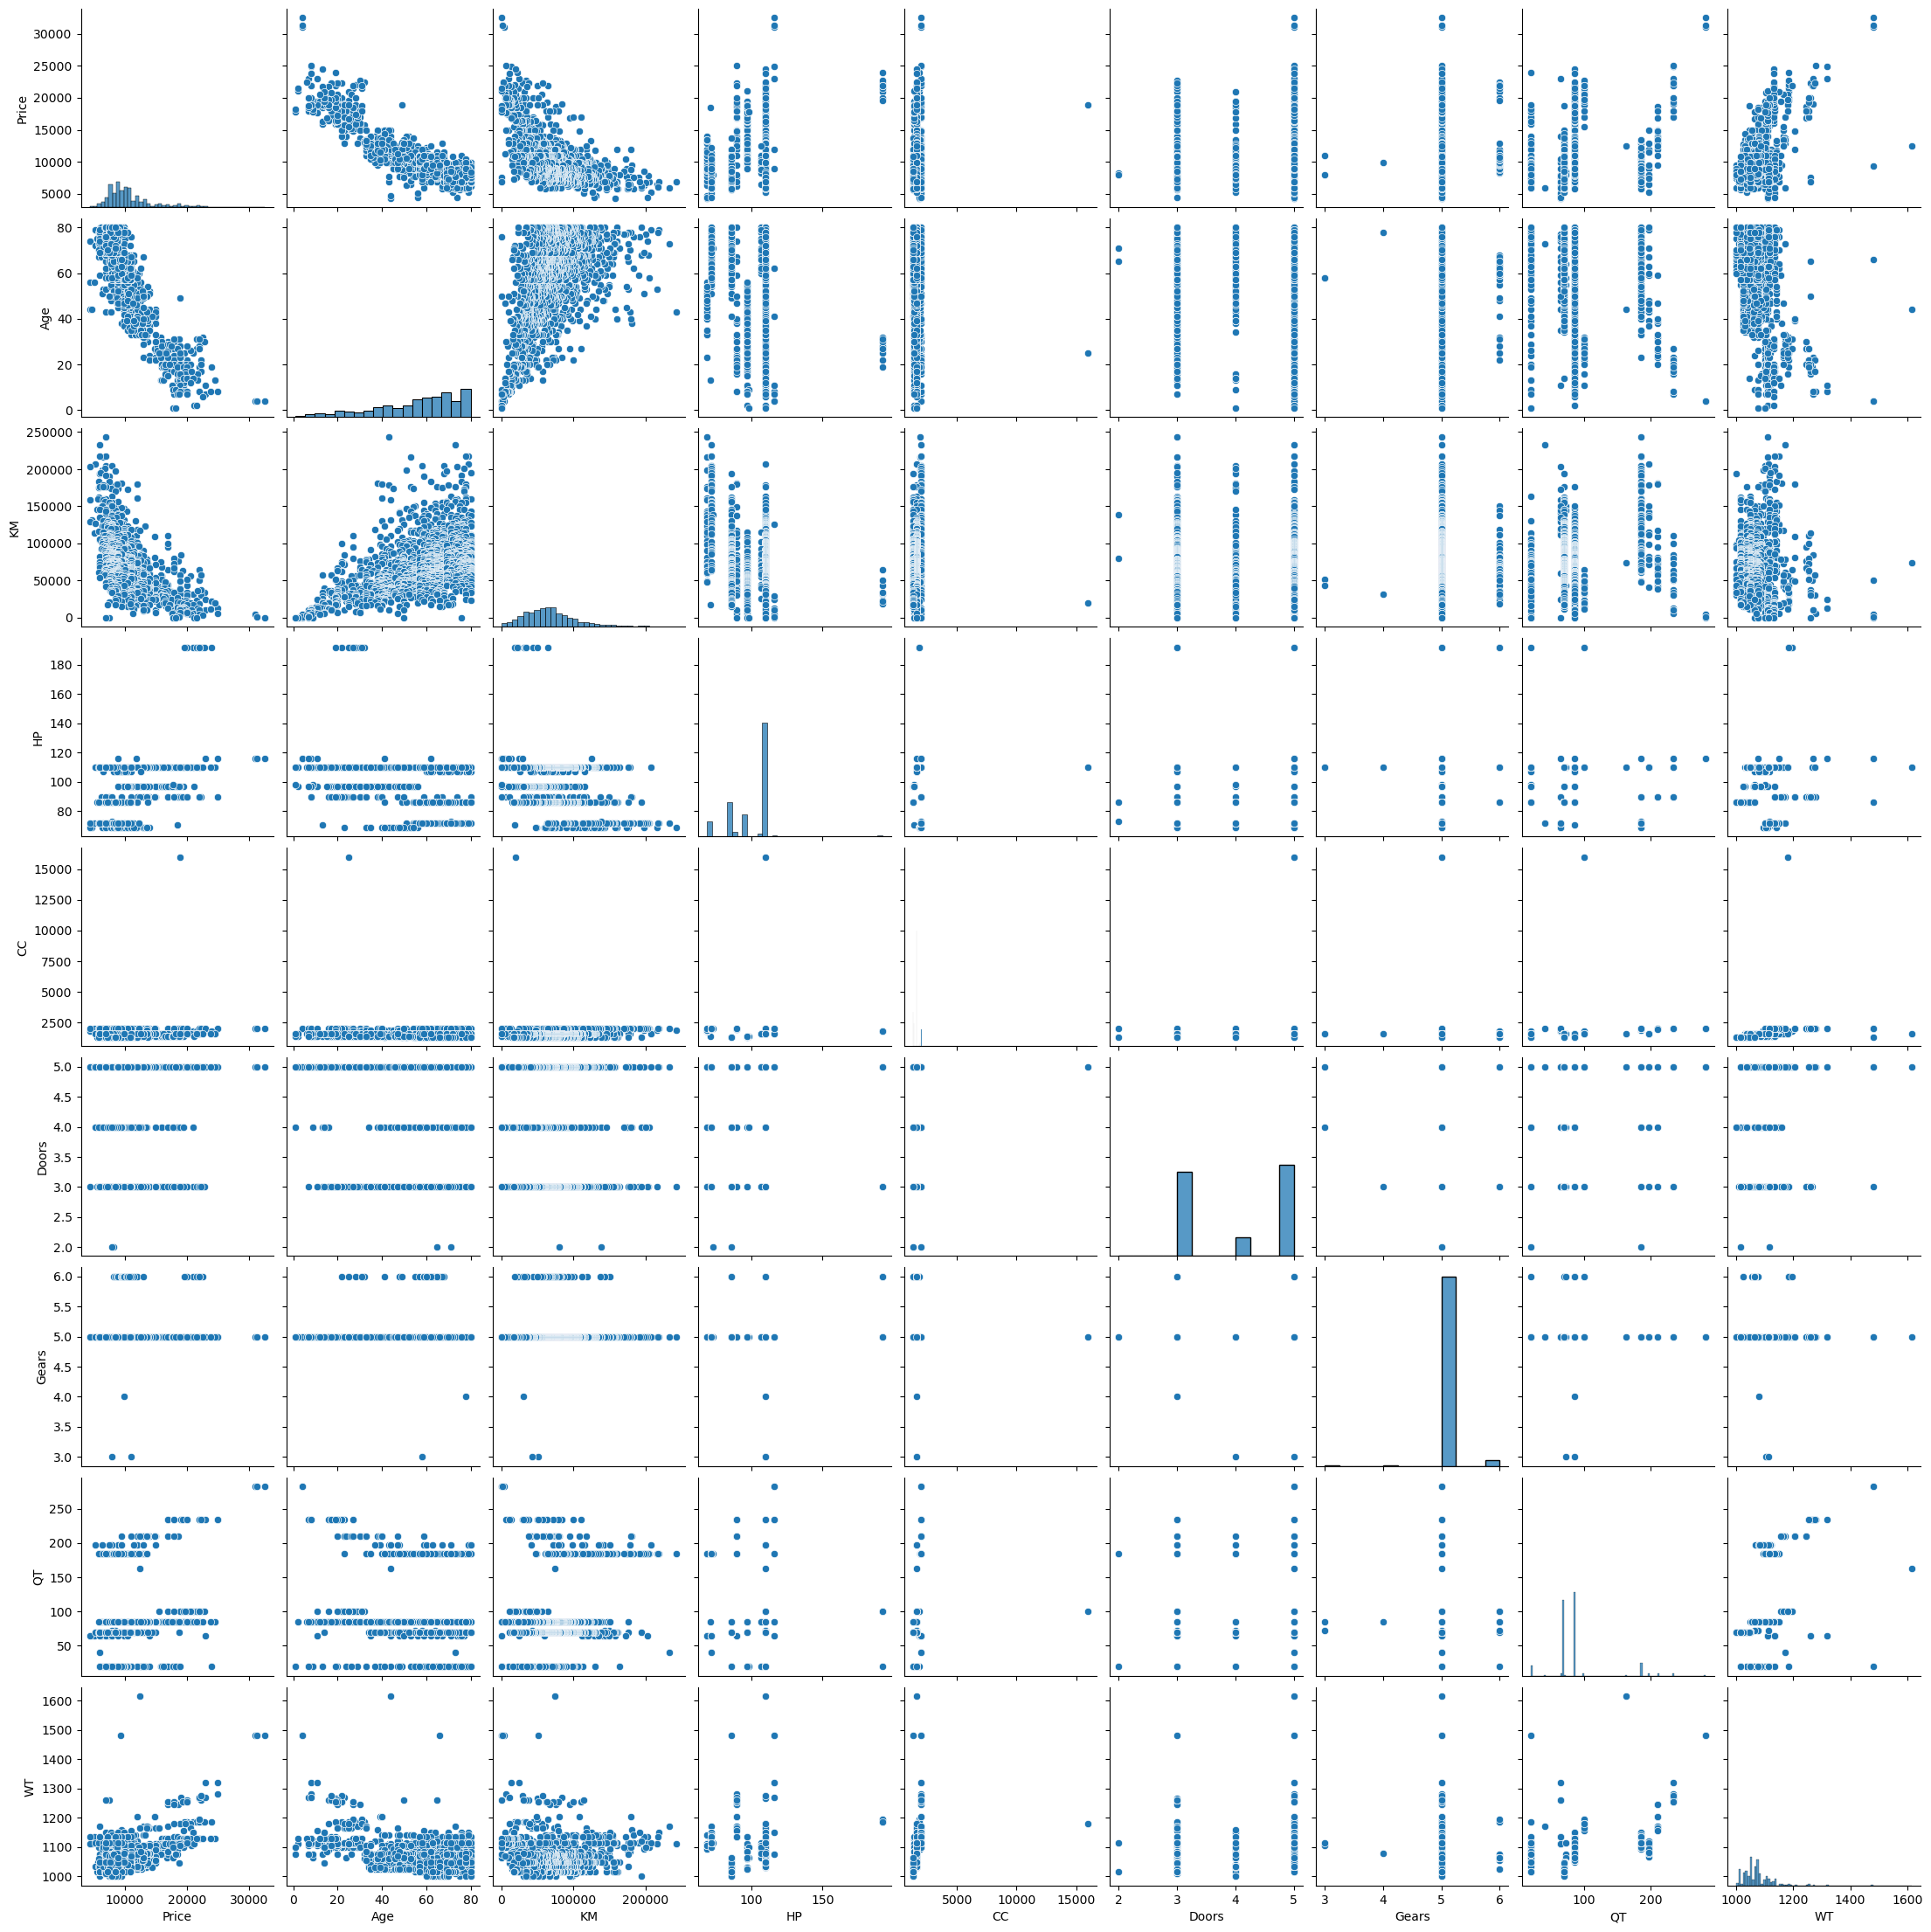

In [39]:
sns.pairplot(data2)

In [43]:
#Building model
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:08:54   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
WT            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Clearly we can see p_values for cc and Doors are greater than 0.05 which states that these features are not signifcant.
So build slr and mlr models for both the features independtly and check which is more significant

In [44]:
slr_cc = smf.ols('Price~CC',data=data2).fit()
slr_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           2.29e-06
Time:                        17:13:05   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
slr_doors = smf.ols('Price~Doors',data=data2).fit()
slr_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           2.40e-12
Time:                        17:14:02   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
mlr_cc_doors = smf.ols('Price~CC+Doors',data=data2).fit()
mlr_cc_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           2.55e-15
Time:                        17:14:40   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
CC             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Calculating VIF

In [47]:
rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+WT',data=data2).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_KM = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+WT',data=data2).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_hp = smf.ols('HP~KM+Age+CC+Doors+Gears+QT+WT',data=data2).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('CC~Age+HP+KM+Doors+Gears+QT+WT',data=data2).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols('Doors~KM+HP+CC+Age+Gears+QT+WT',data=data2).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~Age+HP+CC+Doors+KM+QT+WT',data=data2).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_qt = smf.ols('QT~KM+HP+CC+Age+Gears+Age+WT',data=data2).fit().rsquared
vif_qt = 1/(1-rsq_qt)

rsq_wt = smf.ols('WT~Age+HP+CC+Doors+KM+QT+Gears',data=data2).fit().rsquared
vif_wt = 1/(1-rsq_wt)

d1 = {'Variables':['Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'WT'],'VIF':[vif_age,vif_KM,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_wt]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.282609
7,WT,2.487180


Plotting QQ plot
Test for Normality of Residuals

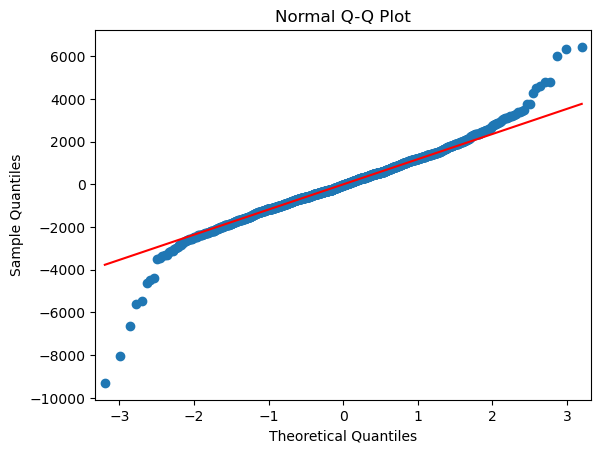

In [48]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q Plot')
plt.show()


In [51]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [52]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

Residual Plot for Homoscedacity or Hetroscedacity

In [54]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

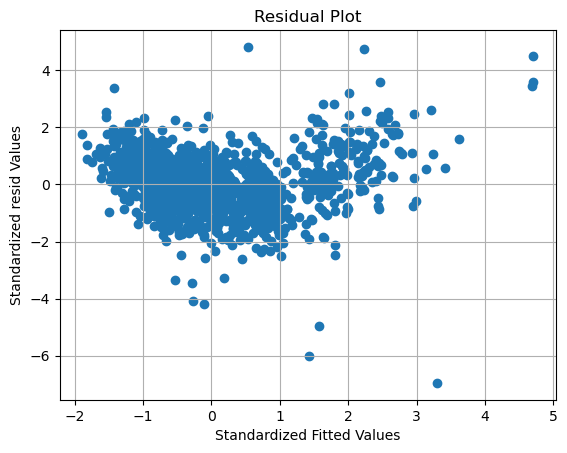

In [55]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.grid()
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized resid Values')
plt.show()

Residuals vs Regressors

eval_env: 1


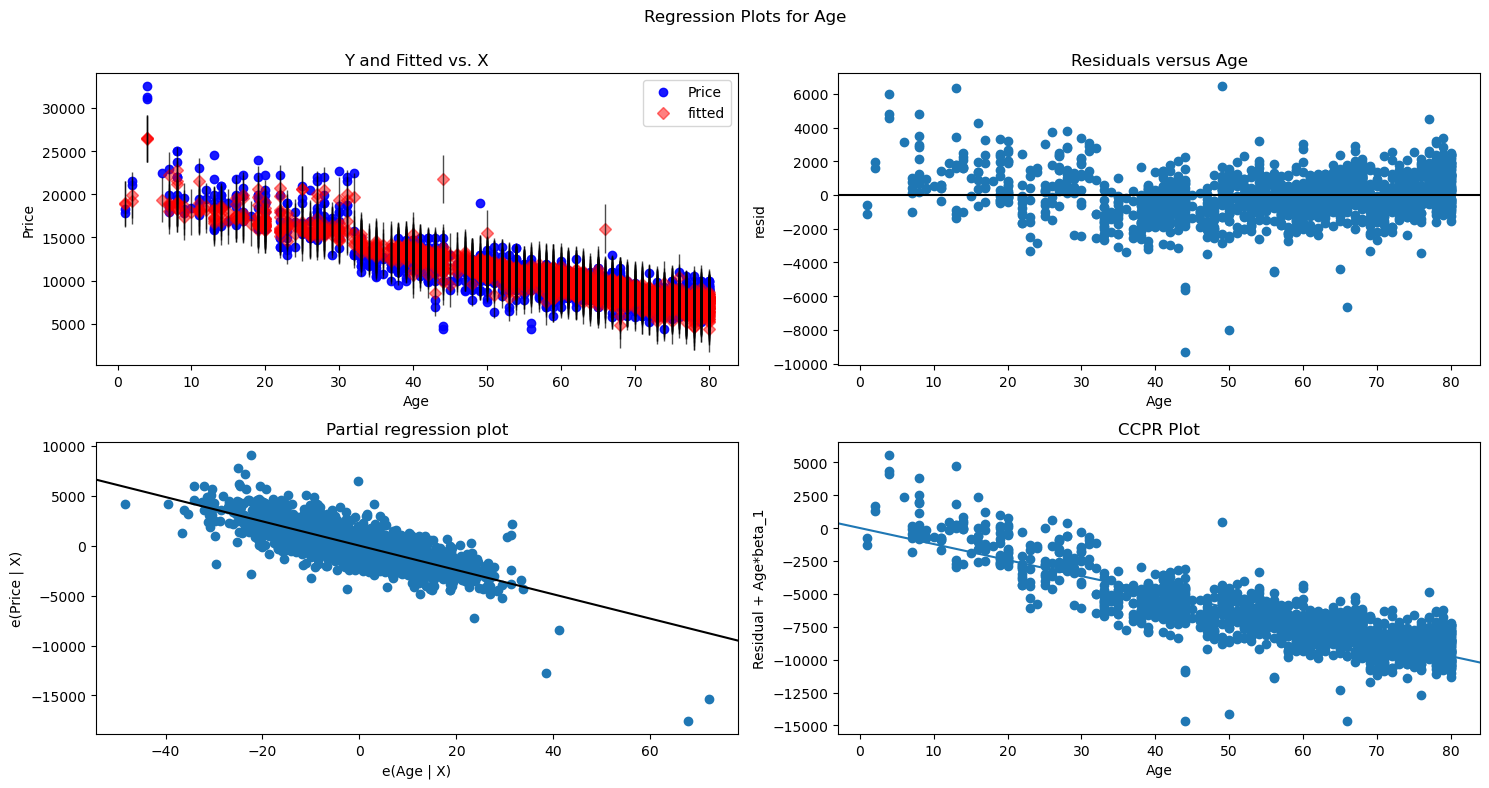

In [56]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


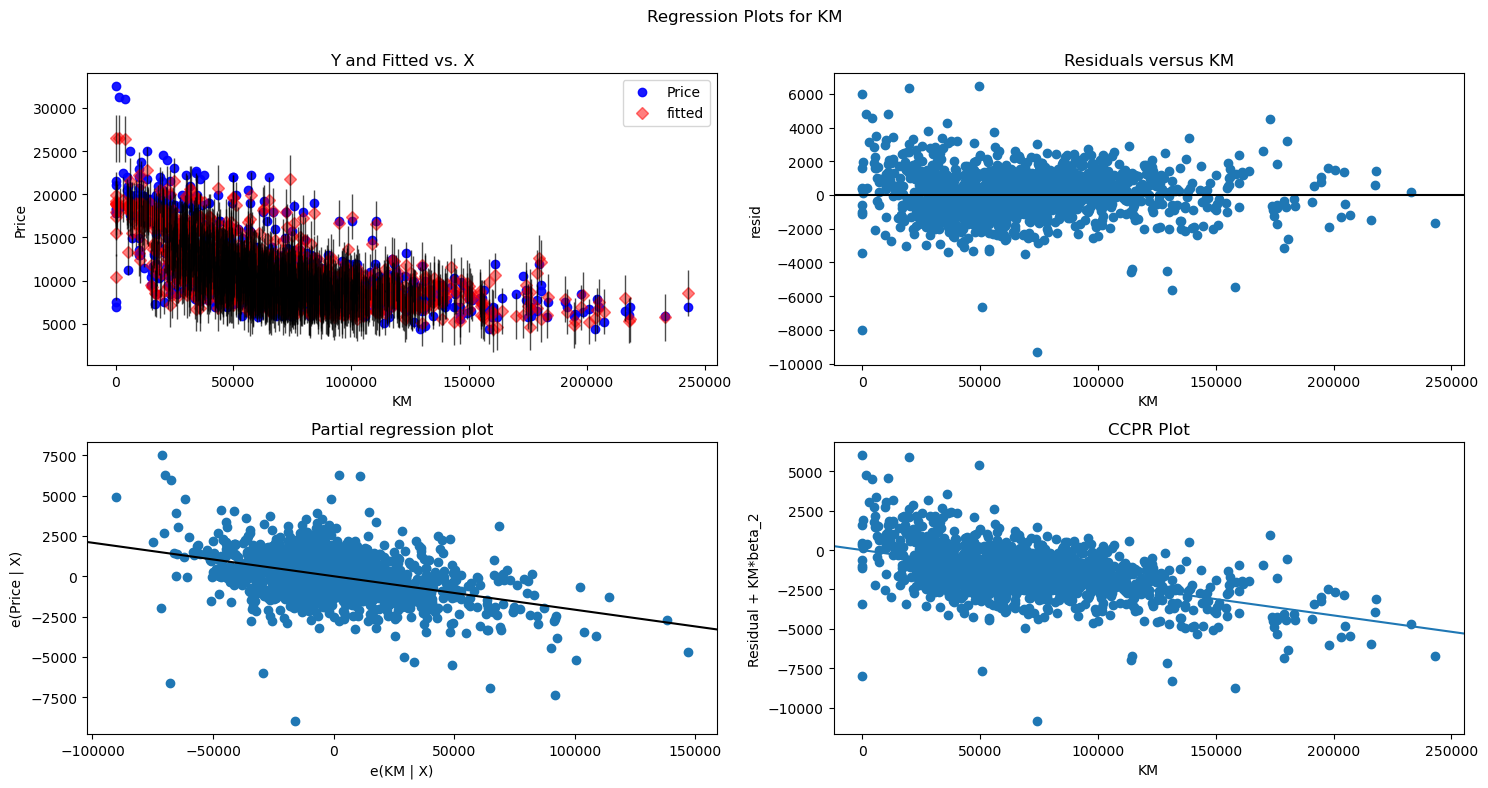

In [57]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


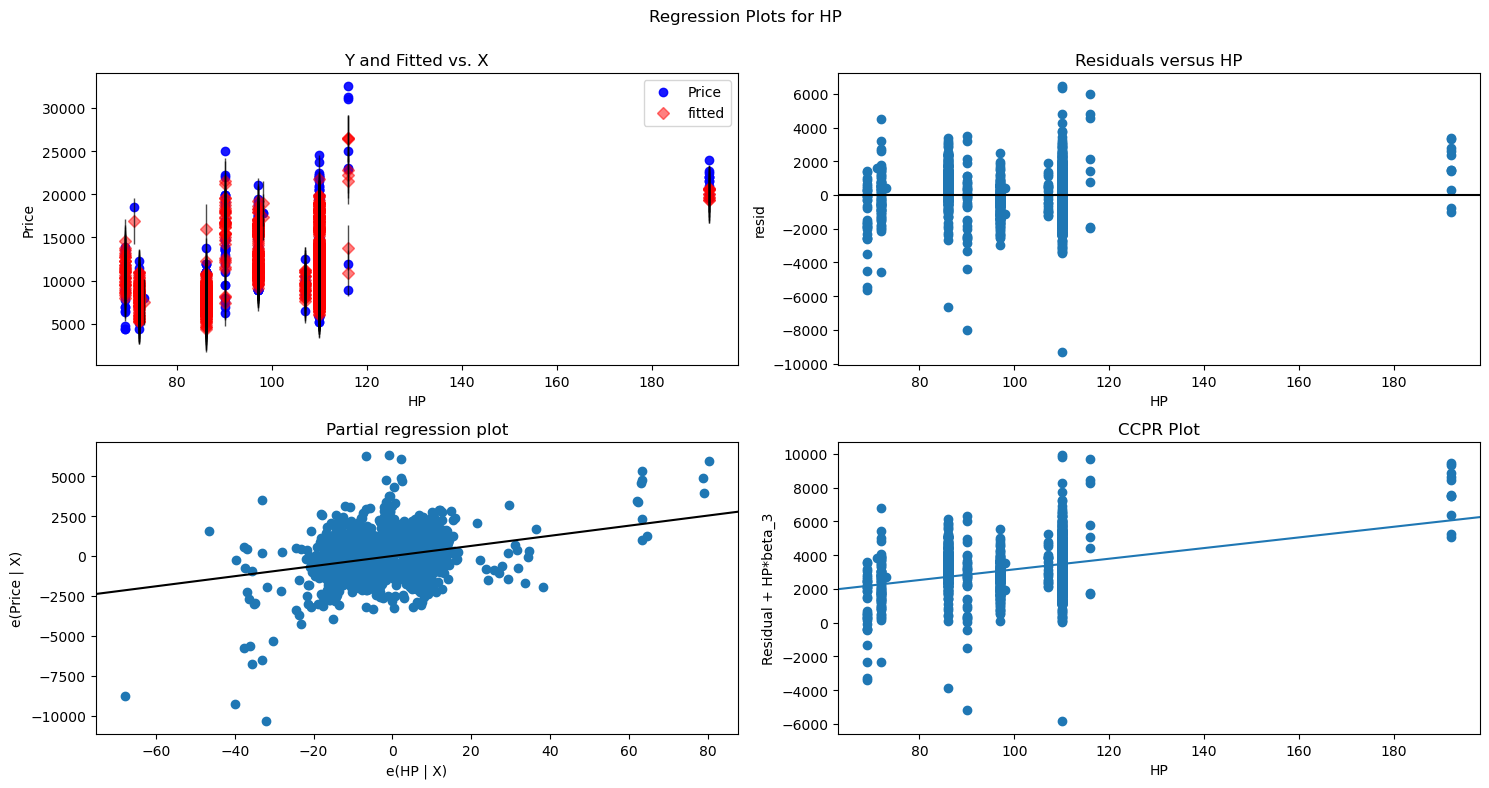

In [58]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


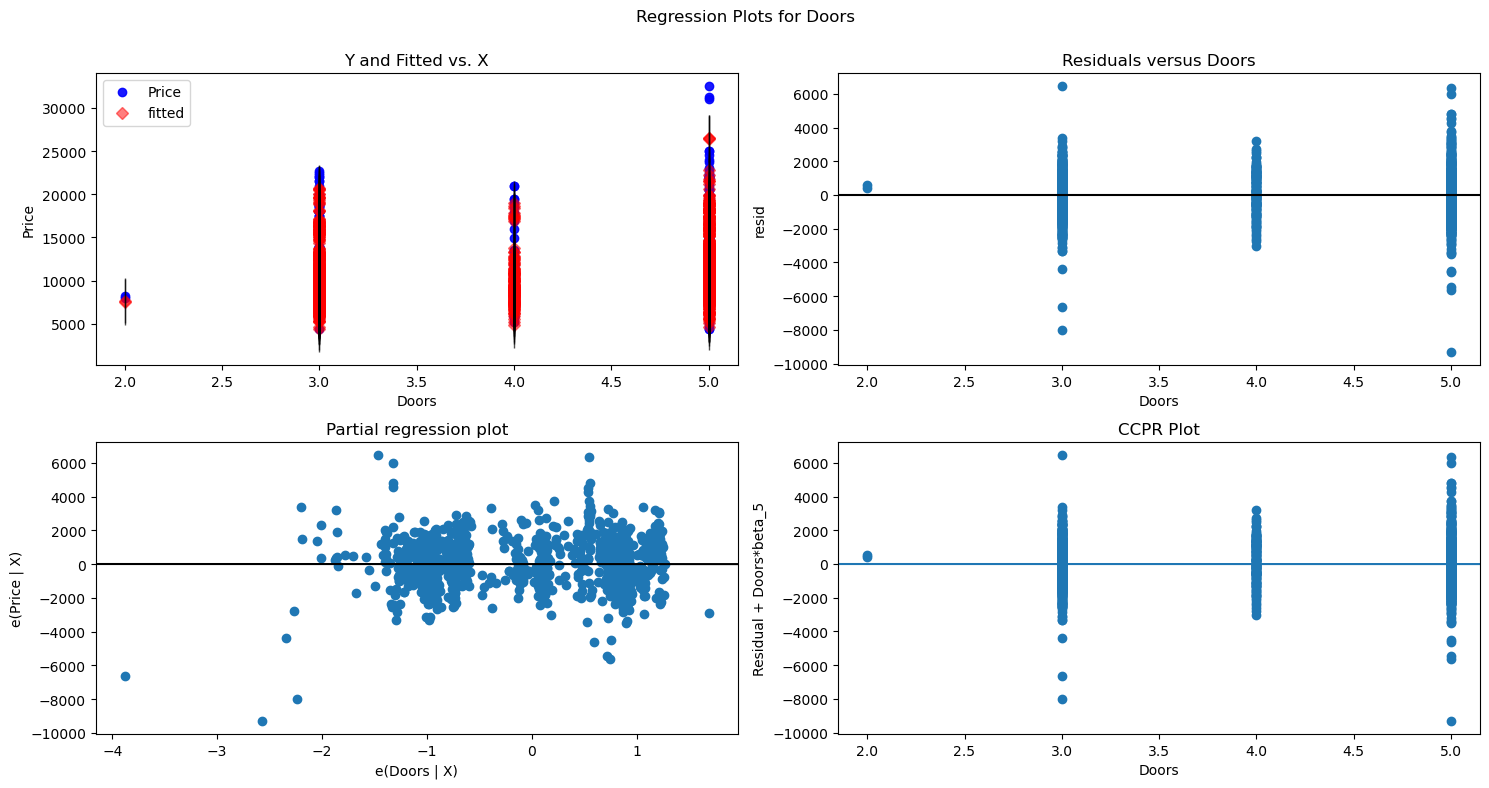

In [59]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


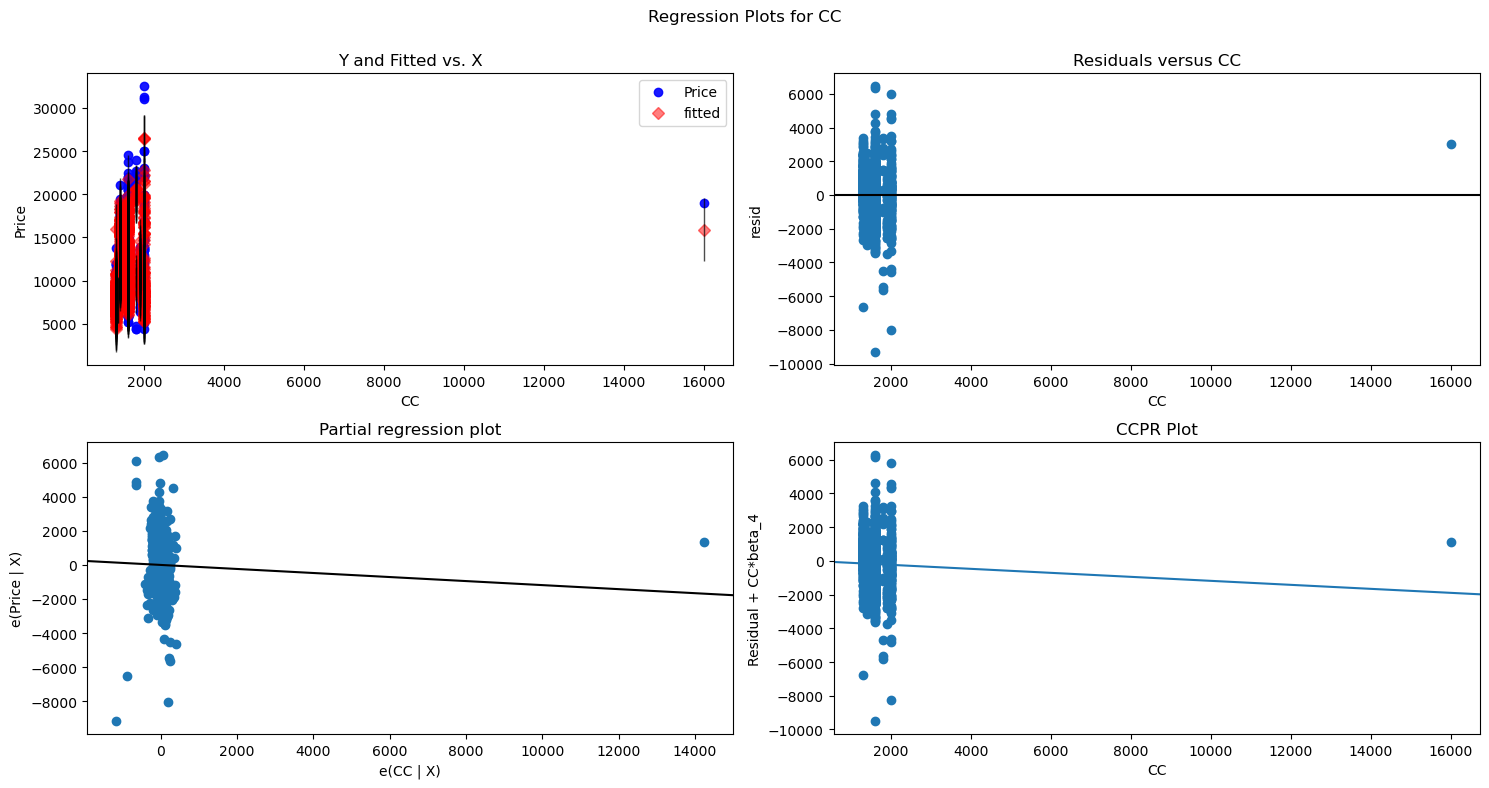

In [60]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


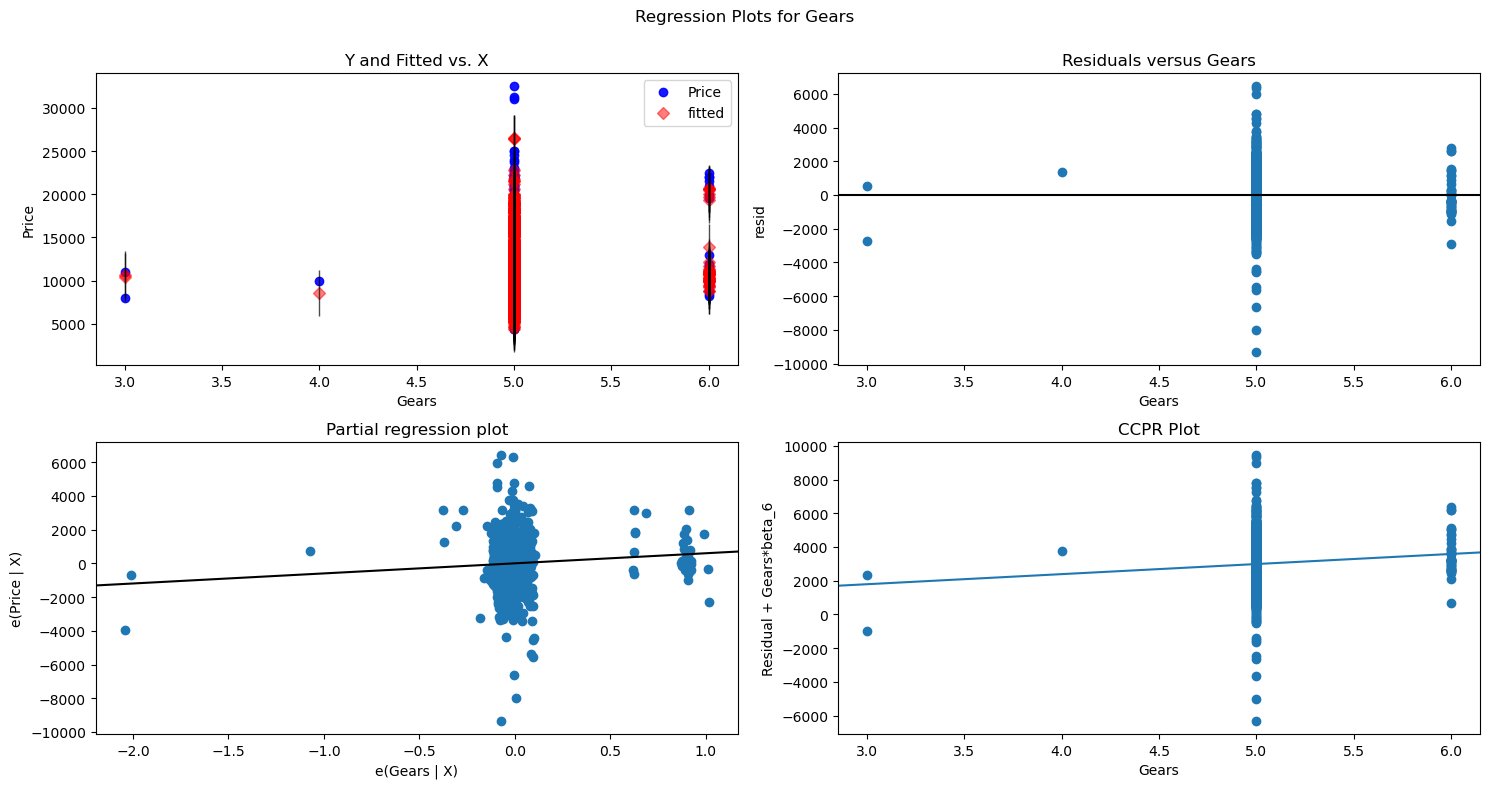

In [61]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


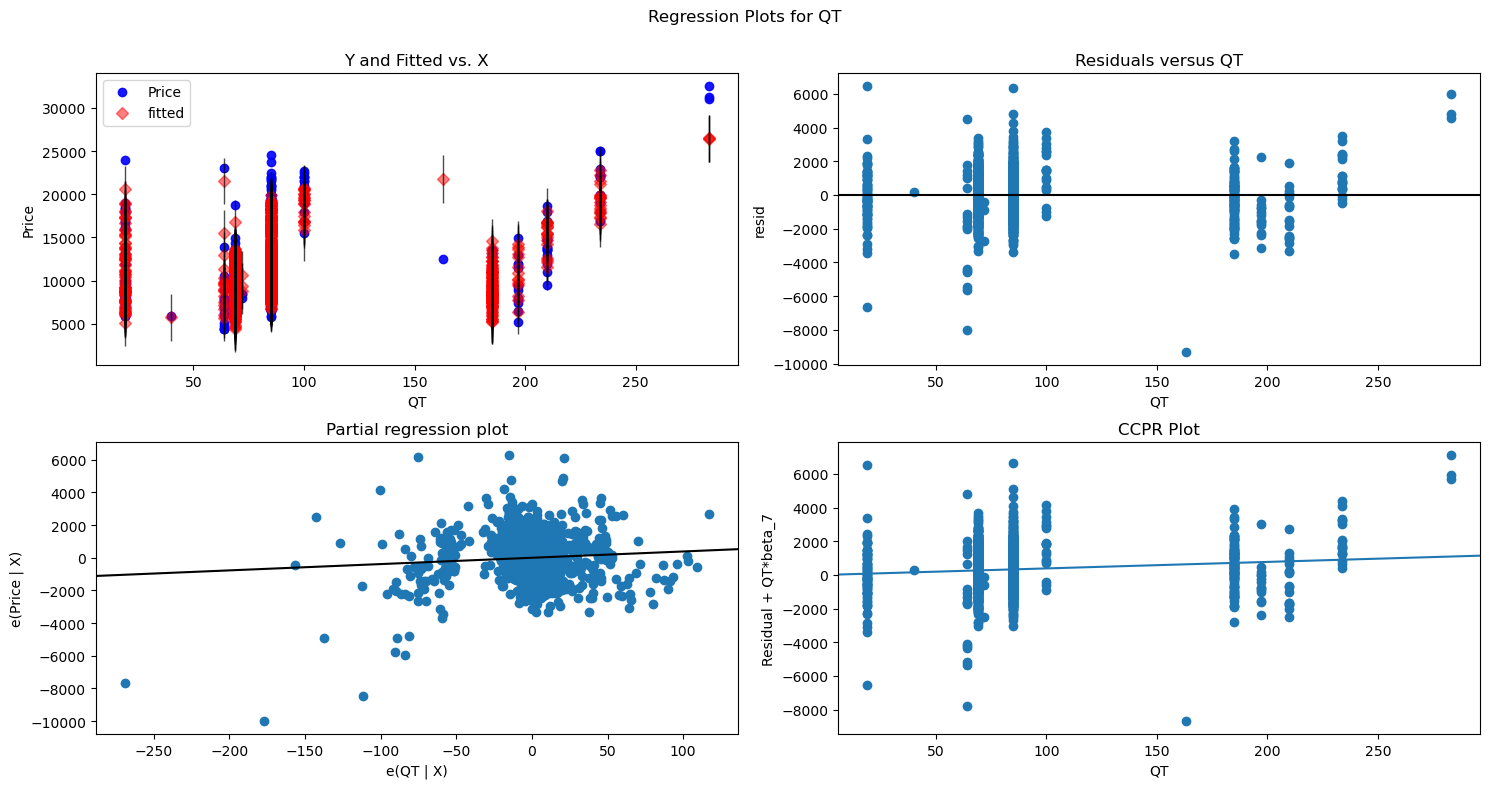

In [62]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


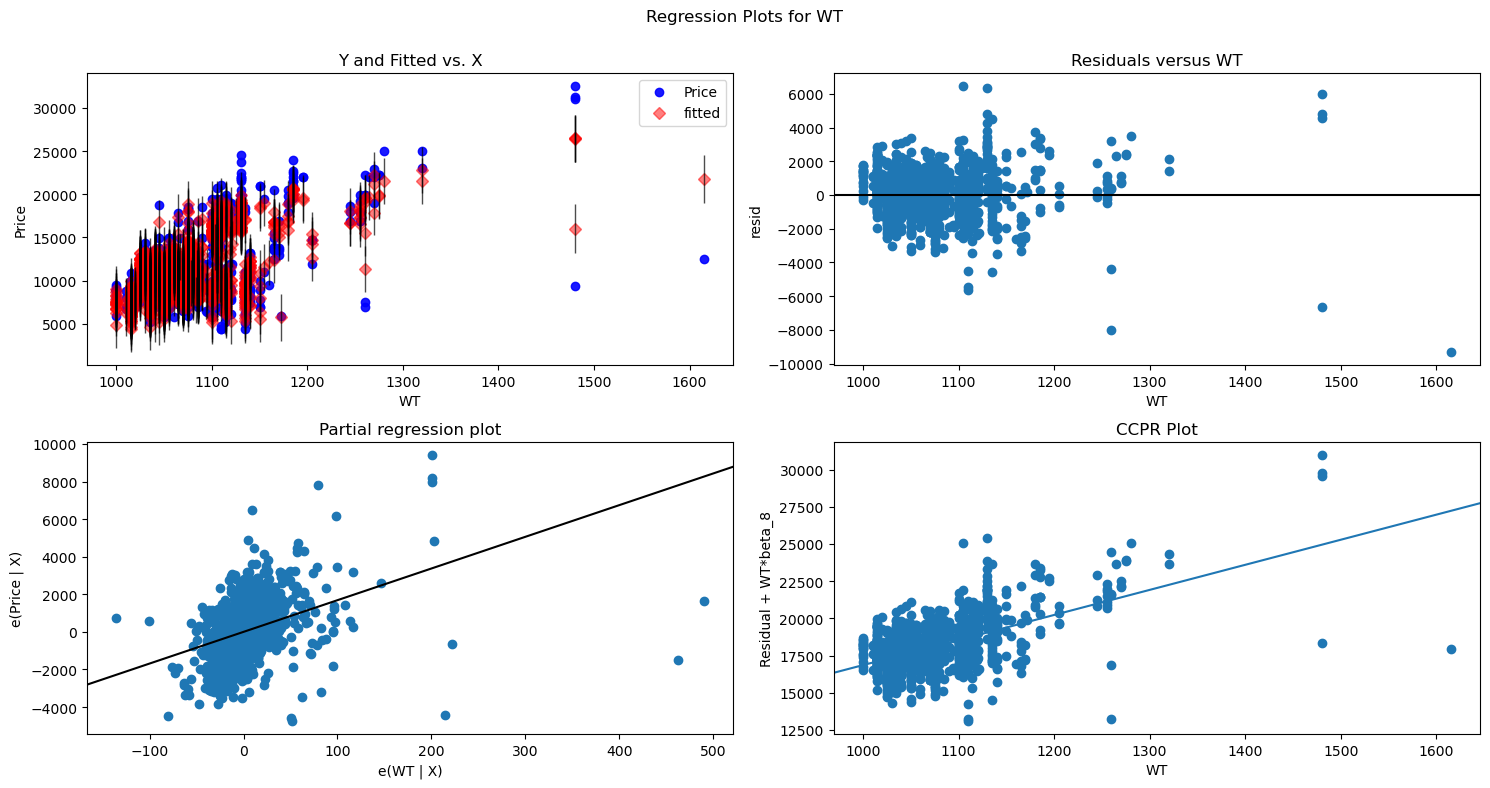

In [63]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'WT',fig=fig)
plt.show()

In [41]:
data2.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'WT'], dtype='object')

Model deletion diagnostics
Detecting Outliers Or Influencers

Cook's Distance

In [64]:
(c,_)= model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

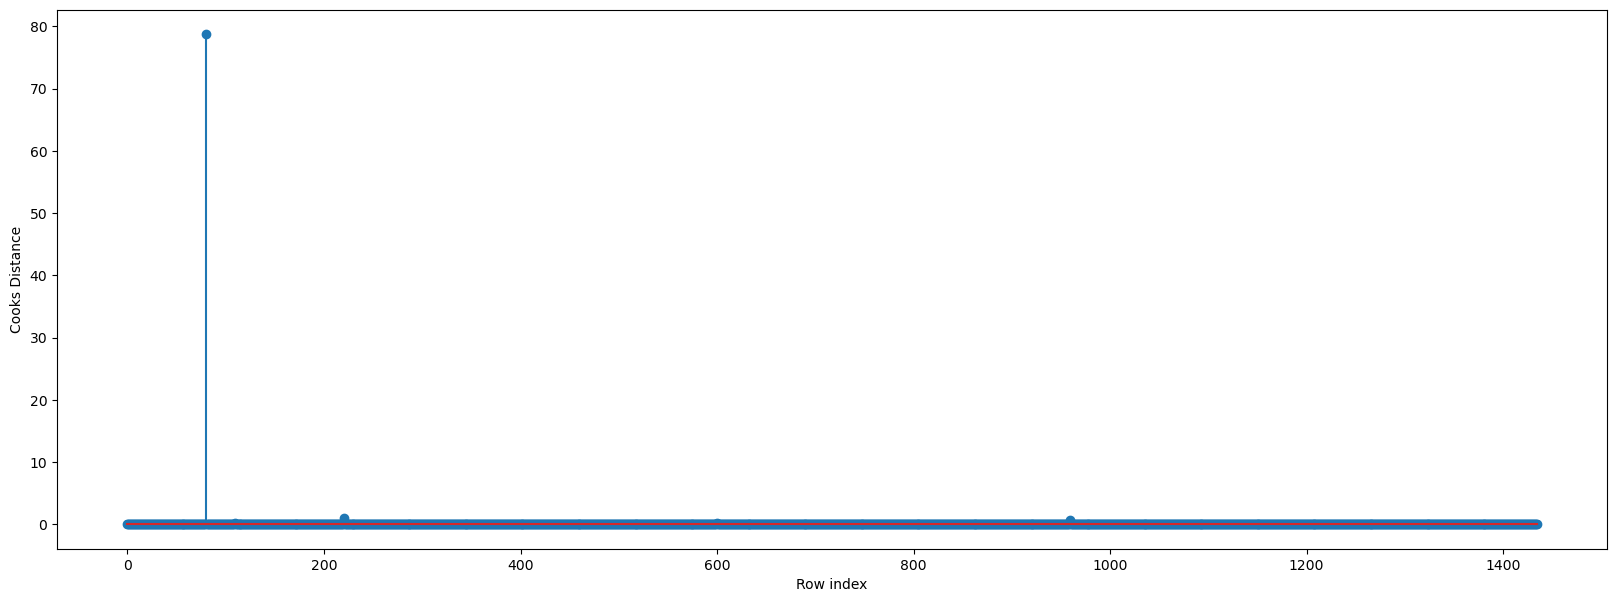

In [65]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [66]:
np.argmax(c),np.max(c)

(80, 78.7295058224916)

High Influence Points

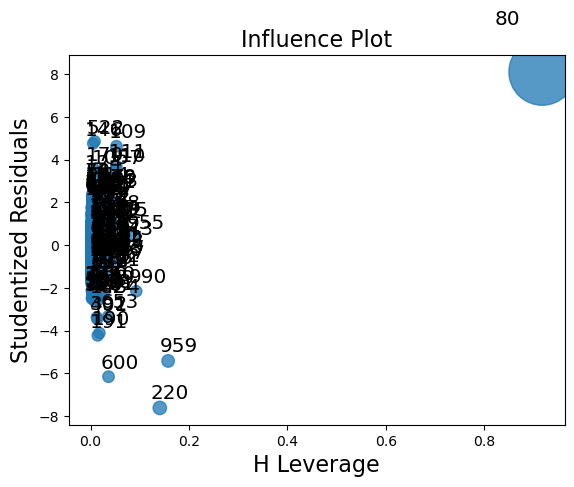

In [67]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

Clearly we can see 80 is the most influencing observation to the model
Checkinf for leverage value

In [68]:
n = data2.shape[0]
k = data2.shape[1]
levarage_cutoff = 3*((k+1)/n)
levarage_cutoff

0.020905923344947737

In [69]:
data2[data2.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
80,18950,25,20019,110,16000,5,5,100,1180


Improving the model 

In [70]:
data3 = data2.drop(data2.index[[80]],axis=0).reset_index(drop=True)
data3.shape

(1434, 9)

In [71]:
#here we can see the shape of the data3 where we removed the most influenced observation by checking the shape with the data2
data2.shape

(1435, 9)

In [72]:
model1 = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=data3).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:55:51   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
CC            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
QT             8.9414      1.427      6.268      0.000       6.143      11.740
WT            20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Clearly we can see there is an improvement in the model r-squared value.

Model deletion and Final Model

In [73]:
while model1.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model1 = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=data3).fit()
        (c,_) = model1.get_influence().cooks_distance
        c
        np.argmax(c), np.max(c)
        data3 = data3.drop(data3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data3
    else:
        final_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=data3).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139028
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is impro

In [74]:
final_model.rsquared

0.9003762532318559

In [75]:
data3

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


In [76]:
pred = final_model.predict(data3)
pred

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64

In [77]:
data4 = data3.copy()
data4['Predicted Price'] = pred
data4.head(10)

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT,Predicted Price
0,13750,23,72937,90,2000,3,5,210,1165,15354.362106
1,14950,26,48000,90,2000,3,5,210,1165,15415.237858
2,13750,30,38500,90,2000,3,5,210,1170,15314.008799
3,12950,32,61000,90,2000,3,5,210,1170,14749.534289
4,16900,27,94612,90,2000,3,5,210,1245,17544.273936
5,18600,30,75889,90,2000,3,5,210,1245,17509.050913
6,12950,23,71138,69,1900,3,5,185,1105,13516.436654
7,19950,22,43610,192,1800,3,6,100,1185,19440.853728
8,19600,25,32189,192,1800,3,6,100,1185,19292.706138
9,17950,24,21716,110,1600,3,5,85,1105,16338.279811


In [78]:
table_data={'Prep_Models':['Model_with_no_changes','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared],
            'RMSE':[np.sqrt(model.mse_resid),np.sqrt(final_model.mse_resid)]}
table=pd.DataFrame(table_data)
table

,Prep_Models,Rsquared,RMSE
0,Model_with_no_changes,0.862520,1341.804619
1,Final_Model,0.900376,975.927140
